# Model stability, some background 

:::{index} single: Stability; introduction 
:::

In [17]:
# HIDDEN in jupyterbook 
#This is code to manage dependencies if the notebook is executed in the google colab cloud service
if 'google.colab' in str(get_ipython()):
  import os
  os.system('apt -qqq install graphviz')
  os.system('pip -qqq install ModelFlowIb ipysheet  --no-dependencies ')

:::{warning}
This chapter is both unfinished and unpolished. Suggestions are very welcome.
::: 
            
:::{warning}
Terminology varies very much between fields of study. 
:::             

In [18]:
import pandas as pd
from IPython.display import display, HTML, Markdown


from modelclass import model 
import modelmf

In [19]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## A model:

A model with:

 - $\textbf n$ number of endogeneous variables
 - $\textbf k$ number of exogeneous variables 
 - $\textbf r$ max lag of endogeneous variables 
 - $\textbf s$ max lag of exogeneous variables 
 - $t$ time frame (year, quarter, day second or another another unit)
 
can be written in two ways, normalized or un-normalized form

### normalized form

\begin{eqnarray}
y_t^1 & = & y_t^2...,y_{t}^n...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^k,...x_{t-s}^1...,x_{t-s}^k) \\
y_t^2 & = & y_t^1...,y_{t}^n...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^k,...x_{t-s}^1...,x_{t-s}^k) \\
\vdots \\
y_t^n & = & y_t^1...,y_{t}^{n-1}...y_{t-r}^1...,y_{t-r}^n,x_t^1...x_{t}^r,x..._{t-s}^1...,x_{t-s}^k)
\end{eqnarray}



Written in matrix notation where  $\textbf{y}_t$ and $\textbf{x}_t$ are vectors of endogenous/exogenous  variables for time t

\begin{eqnarray}  
\textbf{y}_t & = & \textbf{F}( \textbf{y}_t \cdots \textbf{y}_{t-r},\textbf{x}_t \cdots \textbf{x}_{t-s})
\end{eqnarray}

The functions are normalized, meaning: 

- Each endogenous variable is on the left hand side one time - and only one time.
- An endogenous variable without lags can **not** be on the right hand side in an equation, which has the variable on the left hand side. 

## The derivatives
We can express the matrices of derivatives with respect to the endogenous and exogenous variables like this: 


\begin{eqnarray*}
A & = & \frac{\partial F}{\partial y_t^T} \\ \\
E_i & = & \frac{\partial F}{\partial y_{t-i}^T } \hspace{5 mm} i=1, \cdots , r\\  \\
F_j & = & \frac{\partial F}{\partial x_{t-j} ^T} \hspace{5 mm} j=0, \cdots , s\\  \\
\end{eqnarray*}



:::{index} Stability; The companion matrix
:::

## The companion matrix
To calculate the effect of small perturbations around a solution the derivative matrices can be used.

For simplicity a system with $r$ (max lag of endogenous variables) of 2 and $s$ (max lag of exogenous variables)  of 1 we have the linearized model:

$\Delta \textbf{y}_t = \textbf{A}\Delta  \textbf{y}_{t} + \Delta E_1 \textbf{y}_{t-1} + \Delta E_2 \textbf{y}_{t-2} +  E_3 \Delta  \textbf{y}_{t-3} + F_0 \Delta x_t + F_1 \Delta x_{t-1}$


Rearranging the equation to isolate $\Delta \textbf{y}_{t}$ on the left side:

$
(  \mathbb{I}-\textbf{A}) \Delta \textbf{y}_{t} = E_1 \Delta \textbf{y}_{t-1} + \Delta E_2 \textbf{y}_{t-2} + \Delta E_3 \textbf{y}_{t-3} + F_0 \Delta x_t + F_1 \Delta x_{t-1}
$

$
\Delta \textbf{y}_{t} = (\mathbb{I}-\textbf{A})^{-1} E_1 \Delta \textbf{y}_{t-1} + (\mathbb{I}-\textbf{A})^{-1} \Delta E_2 \textbf{y}_{t-2} + (\mathbb{I}-\textbf{A})^{-1} \Delta E_3 \textbf{y}_{t-3} + (\mathbb{I}-\textbf{A})^{-1} F_0 \Delta x_t +  (\mathbb{I}-\textbf{A})^{-1} F_1 \Delta x_{t-1}
$

This is a 3th order system of difference equations. In order to be able to find the gain stability of the system it has to be rewritten as 1st order system of difference equations. That is a system with only one lag. Fortunately there is 
a standard way to do this. It runs as follow: 


Using the state vector:
$
\textbf{z}_t = \begin{bmatrix} \textbf{y}_t \\ \textbf{y}_{t-1} \\ \textbf{y}_{t-2} \end{bmatrix}$ and $\textbf{w}_t = \begin{bmatrix} \textbf{x}_t \\ \textbf{x}_{t-1} \end{bmatrix}
$


The system can be expressed as:

$
\Delta \textbf{z}_{t} = \underbrace{\begin{bmatrix} (\mathbb{I}-\textbf{A})^{-1}E_1 & (\mathbb{I}-\textbf{A})^{-1}E_2 & (\mathbb{I}-\textbf{A})^{-1}E_3 \\ \textbf{I} & \textbf{0} & \textbf{0} \\ \textbf{0} & \textbf{I} & \textbf{0} \end{bmatrix}}_{\textbf{C}} \Delta \textbf{z}_{t-1} +
\left[\begin{matrix}(\mathbb{I}-\textbf{A})^{-1} F_{0} & (\mathbb{I}-\textbf{A})^{-1} F_{1}  \\{0} & {0}  \\{0} & {0} \\\end{matrix}\right]
\Delta \textbf{w}_t$

This system is a first order system - and the stability can be evaluated using the matrix:

$
\textbf{C} = \begin{bmatrix} (\mathbb{I}-\textbf{A})^{-1}E_1 & (\mathbb{I}-\textbf{A})^{-1}E_2 & (\mathbb{I}-\textbf{A})^{-1}E_3 \\ \textbf{I} & \textbf{0} & \textbf{0} \\ \textbf{0} & \textbf{I} & \textbf{0} \end{bmatrix}
$


also known as **the companion matrix** 

If the systematic in construction the companion matrix with max lag endogenous variable of 2 can be extended to any numbers of lags. 

## Stability and the eignvalues of the companion matrix

The dynamic behavior can be 
evaluated by looking at the eigenvalues $\textbf{e}_{t}$ of the companion matrix $((I-\bar A)^{-1}\bar E )$. Note that $\textbf{e}_{t}$ can are complex numbers.

 - If all $\lvert \textbf{e}_{t} \lvert < 1$ the system will converge. 
 - If at least one of the eigenvalues is larger than one, the system will amplify. 
 -  If at least one $\textbf{e}_{t}$ has an imaginary part the system will oscillate 
    - dampened if all $\lvert \textbf{e}_{t} \lvert < 1$ or 
    - amplifying  if one $\lvert \textbf{e}_{t} \lvert > 1$.

The eigenvalues and associated eigenvectors can be found by the function `\<modelclass>.get_df_eigen_dict()` which will be used below.

'.get_df_eigen_dict()' returns a dictionary where the key is the year and the value is a dataframe where first row is the eigenvalues 
and the folowing rows are the eigenvectors. 

The function below a small model Solow model and a dataframe, it the display the eigenvalues in a polar coordinate where imaginary values are at the y-axis. 

The function also displays the result of the model. The result do not nessary give economic meaning. But shows how the system's stability reflects the 
eigenvalues of the companion matrix. 

## Calculating Eigenvalues and eigenvectors using modelflow 
Modelflow has a can calculate the derivative matrices $A, E_i$ and $F_j$ and create the companion matrix and the associate eigenvalues and eigenvectors. 

Below a function is defined. It sets up a simple solow growth model and associate data. After solving the model the companion matrix is calculated and 
displayed. 

In [42]:
def calculate_eigen(mul,acc,years=100,show=False,latexprint=False):
    '''Function which creates a Samuelson Multiplier accelerator model, runs it
    and alculates the eigenvalues for the compaignion matrix in order to 
    evaluate stability. 
    
    A polar plot of the compex eigenvalues and graphs of the endogenous variables can 
    be displayes '''
    
    fam   = f'''\
    frml <>  y = c+i $ 
    frml <I> c = {mul} * y(-1) $
    frml <>  i = {acc} * ((c-c(-1))+ 0.3 * (c(-2)-c(-1))  )$'''

    mma = model(fam,modelname = 'Accelerator multiplicator model')
    
    # Generate data
    df = pd.DataFrame([[1000,200]]*years,index=range(2018,2018+years),columns=['Y','IM'])
    
    # Generate lagged variables for c
    baseline  = df.mfcalc(f'c = {mul} * y(-1)') 
    
    # Solve the model 
    _  = mma(baseline,2021,2050,silent=True)     # Solve the model 
    
    # Retrieve a dictionary with a dataframe with eigenvalues and eigenvectors for each year 
    eig_dict = mma.get_df_eigen_dict()
    
    # In this example we only want the values for one year. The model is linear and time independent 
    eig21 = eig_dict[2021]
    
    # Define a function which calculates a list of absolute values when served a dataframe column of complex numbers
    compabs = lambda complex: [abs(value) for index,value in complex.items()]
    
    # now only retain the columns where the length of the eigenvalues are above 0.0001 
    eig21out = (eig21.   
                T.        # Trtanspose as we query and eval on columns 
                eval('absolute_value=@compabs(Eigenvalues)'). # calculate the absolute value of the eigenvalue 
                query('absolute_value>=0.0001').              # Select the rows where the abs value is above 0+.0001
                drop('absolute_value',axis=1).                # We dont need the absolute value anymore, so the column is dropped. 
                T)   # Trtanspose again. 
    
    display(Markdown(f'**Model where multiplier = {mul} and accelerator = {acc}**'))
    print(mma.equations)
    display(mma.stability_newton.eigenvector_plot(size=(4,4),per=2023));       # show the eigenvalues 
    display (mma[['Y','C','I']].plot(title=f'values for multiplier = {mul} and accelerator = {acc}' ))  # Show the solution
    if show: 

        display(Markdown(f'**Compagnion matrix**'))

        display(model.compstyle( mma.stability_newton.get_df_comp_dict()[2021])) 


        display(eig21.style.set_caption('<b>Original eigenvalues and -vectors'))
        display(model.compstyle(eig21out).set_caption('<b>Non zero eigenvalues and -vectors'))
       #display(mma.stability_newton.eigenvector_plot(size=(4,4),per=2023));       # show the eigenvalues 

        if latexprint: 
            jacobi= mma.stability_newton.A_dic[2021]
            for l,j in jacobi.items(): 
                name = 'A = ' if l=='lag=0' else f'E_{l.split("-")[1]} = '
                print(name)
                print(j.to_latex())
    return mma.stability_newton

##  $\lvert \textbf{e}_{t} \lvert < 1$ No gain

* Take care. Lags or leads in the equations, mfcalc run for 2019 to 2047


**Model where multiplier = 0.5 and accelerator = 0.1**

    frml <>  y = c+i $ 
    frml <I> c = 0.5 * y(-1) $
    frml <>  i = 0.1 * ((c-c(-1))+ 0.3 * (c(-2)-c(-1))  )$


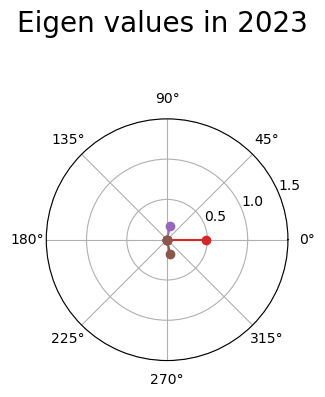

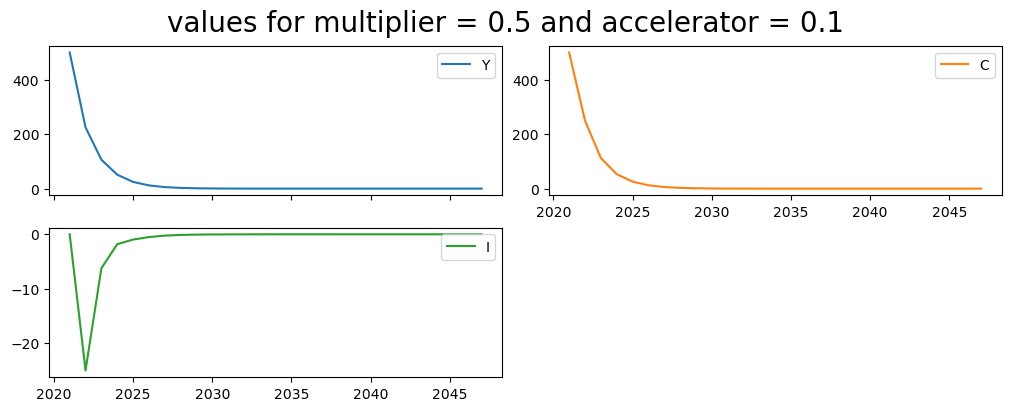

In [43]:
xx = calculate_eigen(mul=0.5,acc=0.1,years=30,show=0);

##  $\lvert \textbf{e}_{t} \lvert > 1$ and imaginary parts. Oscillate with increasing amplitude 

* Take care. Lags or leads in the equations, mfcalc run for 2019 to 2047


**Model where multiplier = 0.8 and accelerator = 0.9**

    frml <>  y = c+i $ 
    frml <I> c = 0.8 * y(-1) $
    frml <>  i = 0.9 * ((c-c(-1))+ 0.3 * (c(-2)-c(-1))  )$


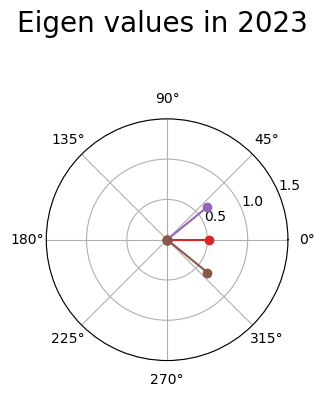

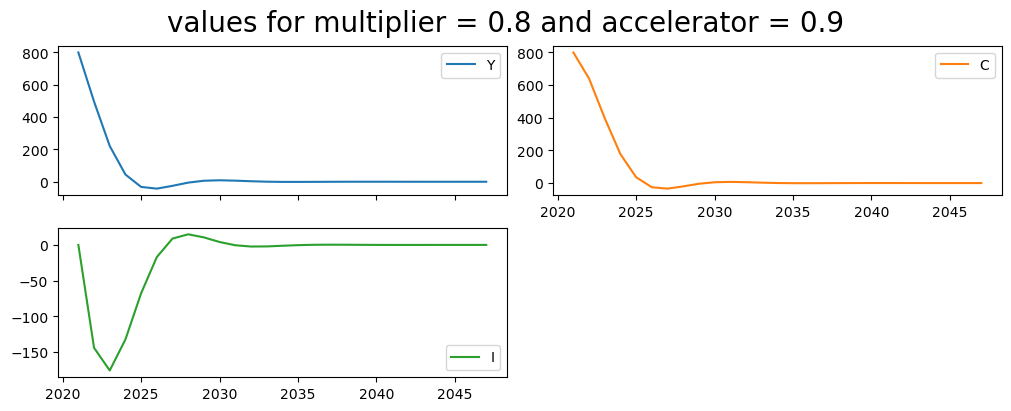

In [44]:
calculate_eigen(mul=0.8,acc=0.9,years=30,show=0);

##  $\lvert \textbf{e}_{t} \lvert = 1$ and imaginary parts. Oscillate perputual  

* Take care. Lags or leads in the equations, mfcalc run for 2019 to 2047


**Model where multiplier = 0.55 and accelerator = 2**

    frml <>  y = c+i $ 
    frml <I> c = 0.55 * y(-1) $
    frml <>  i = 2 * ((c-c(-1))+ 0.3 * (c(-2)-c(-1))  )$


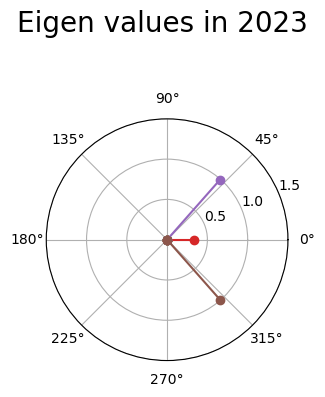

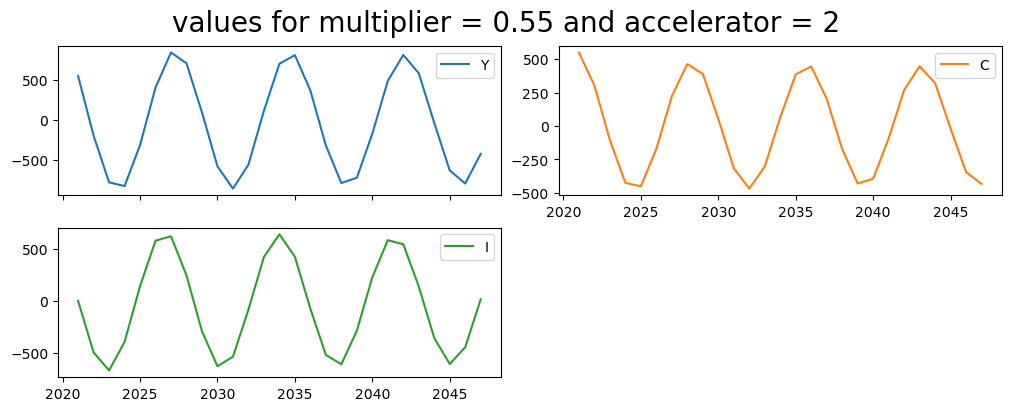

In [45]:
newton =  calculate_eigen(mul=0.5500,acc=2,years=30,show=0);

## Jackknife identify impact from each equation. 
To understand the impact of each equation a jackknife can be made. This is done by deleting  the rows and columns for each equation and record the new eigenvalues. 

The idea is to try to identify the equations which contributes most to the total eigenvalues. 

The newton object returned above will also contains this operation. The `newton.get_eigen_jackknife_abs_select(year)` function will return the max absolute eigenvalue when for each equations is deleted. It also returns the eigenvalues when no equation is deleted. 

:::{note}
The terminology is loosely coined from Jackknife resampling https://en.wikipedia.org/wiki/Jackknife_resampling. 

Contributions to better naming are very welcome. 
:::

In [24]:
newton.get_eigen_jackknife_abs_select(2025)

0 C
1 I
2 Y


{'ALL': 0.9958213512988556,
 'C_excluded': 0.0,
 'I_excluded': 0.55,
 'Y_excluded': 0.0}

# Create a Samuleson multiplier accelerator model 

In [2]:
fma   = f'''
gdp = consumption+investment  
consumption = mul * gdp(-1)
investment = acc * (consumption-consumption(-1)) + exo_investment'''
mma = model.from_eq(fma,modelname = 'Accelerator multiplicator model')

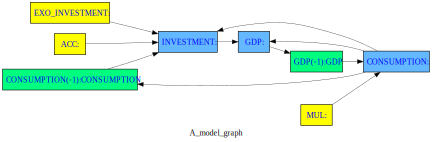

In [3]:
mma.drawmodel()

# A function which generates a dataframe with values

In [4]:
def get_df(mul=0.9,acc=0.5,gdp=1000,im=200,years=100):
    'Creates imput dataframe to accelerator multiplier model '
    df = pd.DataFrame([[gdp]]*years,index=range(2018,2018+years),columns=['GDP'])
    df.loc[:,'MUL']= mul
    df.loc[:,'ACC']= acc
    df.loc[:,'CONSUMPTION']= gdp*mul
    df.loc[:,'EXO_INVESTMENT']= im
    return df
base = get_df()
base.head()

,GDP,MUL,ACC,CONSUMPTION,EXO_INVESTMENT
2018,1000,0.9,0.5,900.0,200
2019,1000,0.9,0.5,900.0,200
2020,1000,0.9,0.5,900.0,200
2021,1000,0.9,0.5,900.0,200
2022,1000,0.9,0.5,900.0,200


# a function to forecast and calculate eigenvalues 